# Load MNIST Data 

In [17]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


   
d0 = pd.read_csv('./mnist_train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

    
        


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


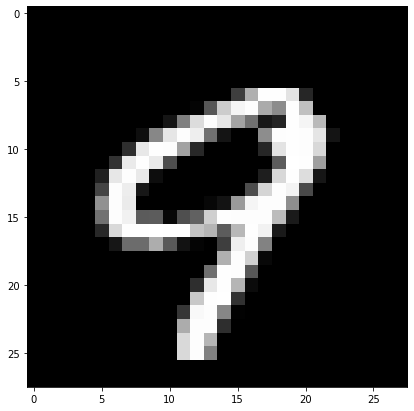

9


In [3]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

#  2D Visualization using PCA 

In [4]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (15000, 784)


In [5]:
# Data-preprocessing: Standardizing the data
# (x_i - mu_i)/sigma_i
# fit_transform - Fit to data, then transform it.

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(15000, 784)


In [6]:
#find the co-variance matrix which is : A^T * A, here A^T is sample_data.T which is 784 x 15k, and A is 15k x 784.
# resultant matrix is 784 x 784
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of covariance matrix = ", covar_matrix.shape)


The shape of covariance matrix =  (784, 784)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [8]:
# projecting the original data sample on the plane 
# formed by two principal eigen vectors by vector-vector multiplication.
# we are taking 784 dataset and project it into top two dimensions, so we need top 2 eigen values
# new_coordinates will have the calculated eigen values applied on sample_data

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [9]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


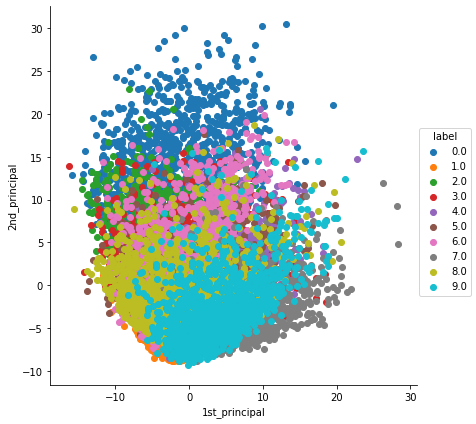

In [10]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

In [11]:
# initializing the pca
# Linear dimensionality reduction using Singular Value Decomposition of the data
# to project it to a lower dimensional space.
from sklearn import decomposition
pca = decomposition.PCA()

In [12]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
# sample_data is standardized above
pca_data = pca.fit_transform(sample_data)

print("shape of pca_data = ", pca_data.shape)
print("shape of labels = ", labels.shape)
print(pca_data.shape)

shape of pca_data =  (15000, 2)
shape of labels =  (15000,)
(15000, 2)


before stacking with labels  (15000, 2)
after stacking with labels  (15000, 3)
       1st_principal  2nd_principal  label
0          -5.043513      -5.558030    1.0
1          19.305268       6.193239    0.0
2          -7.678794      -1.910546    1.0
3          -0.464831       5.524192    4.0
4          26.644292       6.366497    0.0
5           1.201281      -0.557148    0.0
6          -6.118887       6.439994    7.0
7           0.215508       4.420924    3.0
8          -0.724654      -1.316087    5.0
9           3.106012      -2.603227    3.0
10          0.521852      -4.864680    8.0
11         -5.077098      -2.419305    9.0
12         -8.126330      -2.071582    1.0
13          1.175239      13.624982    3.0
14          6.436000       0.355792    3.0
15         -8.004971      -1.239804    1.0
16          0.619535       5.284304    2.0
17          8.356819      -9.520097    0.0
18         -6.802736       1.646744    7.0
19         11.790064       4.955022    5.0
20         -3.6431

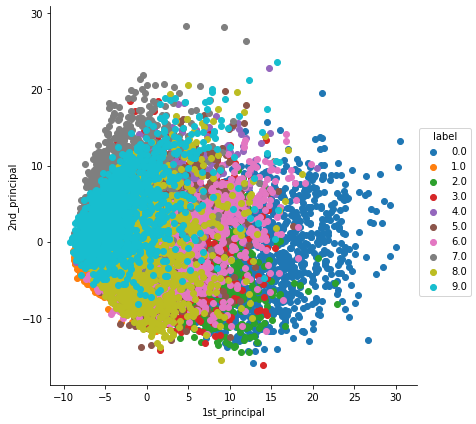

In [13]:
# attaching the label for each 2-d data point 
# np.vstack - Stack arrays in sequence vertically (row wise).
print("before stacking with labels ", pca_data.shape)
pca_data = np.vstack((pca_data.T, labels)).T
print("after stacking with labels ",pca_data.shape)
# creating a new data from which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
print(pca_df)
plt.show()

# PCA for dimensionality redcution (not for visualization)

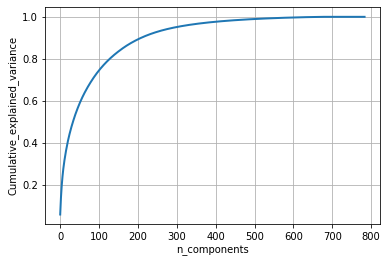

In [14]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

# t-SNE using Scikit-Learn

In [15]:
# rough

print(data_1000.shape)
print(labels_1000.shape)
print(tsne_data.T.shape)


NameError: name 'data_1000' is not defined

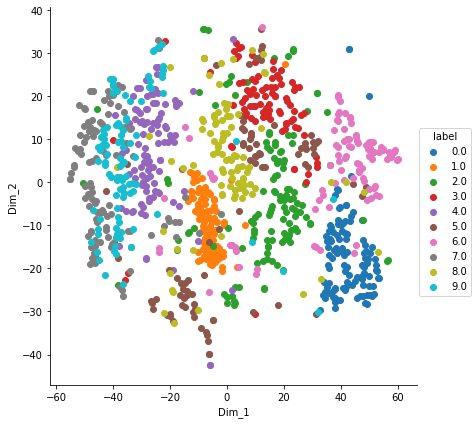

In [18]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components/axes = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

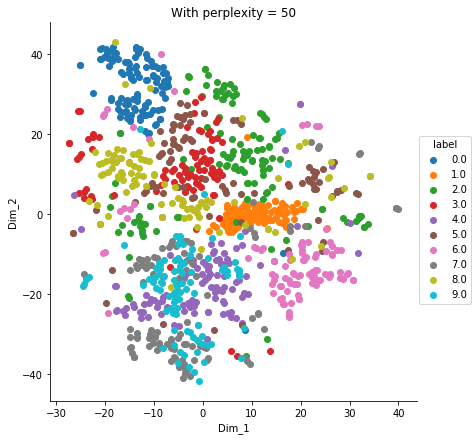

In [19]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

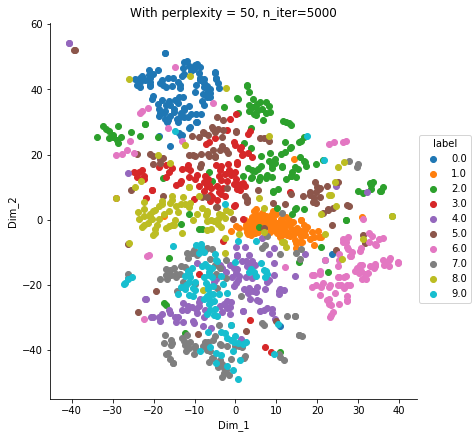

In [20]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

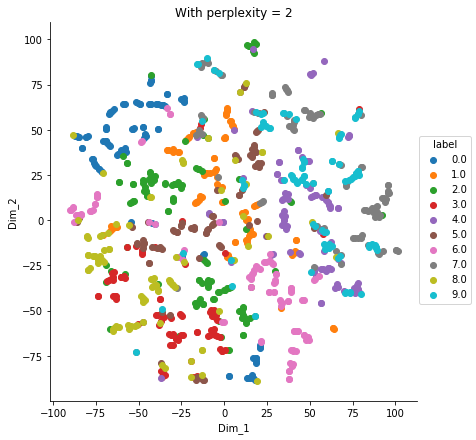

In [21]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

In [5]:
#Excercise: Run the same analysis using 42K points with various 
#values of perplexity and iterations.

# If you use all of the points, you can expect plots like this blog below:
# http://colah.github.io/posts/2014-10-Visualizing-MNIST/